In [1]:
import sys
import rpy2.robjects.packages as rpackages
import pandas as pd
import pickle
base = rpackages.importr('base')

In [2]:
sys.path.insert(0, '..')

# test _regulon_convert

In [3]:
from mraGSEAplot._regulon_convert import regulon_r2p, regulon_p2r

In [4]:
base.load('~/usrlib/hbtrc_pfc_153_sym-regulon.rda')
regulon_pfc = base.mget('regulon')

In [8]:
regulon_df = regulon_r2p(regulon_pfc[0])

/home/chw_linux/profolio/github/mraGSEAplot/test/../mraGSEAplot/_regulon_convert.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regulon_df = pd.concat([regulon_df,temp_df],ignore_index=True)


In [9]:
regulon_df

,MR,target,tfmode,likelihood
0,NR2E3,ADA,-0.988442,0.948872
1,NR2E3,SAE1,0.350817,0.483334
2,NR2E3,EDIL3,-0.299509,0.983146
3,NR2E3,CDH17,0.092116,0.592283
4,NR2E3,CNIH1,0.074758,0.483334
...,...,...,...,...
1007732,DMTF1,PLEKHM1,-0.076580,0.975819
1007733,DMTF1,CD302,-0.065254,0.301389
1007734,DMTF1,HS3ST3B1,0.092056,0.896337
1007735,DMTF1,TNFSF15,-0.331651,0.483334


In [10]:
regulon_r = regulon_p2r(regulon_df)

In [11]:
regulon_r

<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
...
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]
<rpy2.robjects.vectors.ListVector object at 0x7fd9d4b6ec40> [RTYPES.VECSXP]
R classes: ('list',)
[ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV..., ..., ListSexpV..., ListSexpV..., ListSexpV..., ListSexpV...]

In [9]:
base.names(regulon_r.rx2['NR2E3'].rx2['tfmode'])

'ADA','SAE1','EDIL3',...,'RABGAP1L','AMMECR1','CDH1'


# test gsea_2way

In [5]:
from mraGSEAplot.gsea_2way import MR_gsea_2way

In [6]:
with open('/home/chw_linux/project/scHIV_human/pbulk_mra/pbulk_tstat_1750MR.pickle', 'rb') as handle:
    tstat = pickle.load(handle)

In [7]:
results_1 = MR_gsea_2way('NR2E3',tstat['exc'],regulon_r)

In [15]:
results_1.keys()

dict_keys(['repressed', 'induced'])

In [16]:
results_1['induced']

{'name': 'prerank',
 'es': -0.3119653243340118,
 'nes': -0.9304506671690213,
 'pval': 0.831,
 'fdr': 1.0,
 'fwerp': 0.967,
 'tag %': '114/384',
 'gene %': '30.81%',
 'lead_genes': 'LDHA;ATP5F1E;TUBA4A;RABAC1;TMEM147;CYC1;UQCRFS1;LAMTOR5;TMEM203;COX6C;NDUFA13;MRPL23;NRXN3;TMX2;DDX54;STARD4;BEX4;SNCB;HNRNPK;DCHS1;DNAJA2;FKBP1A;RPL30;RPL14;TMEM19;MRPS7;PLXDC1;SCN2B;PVALB;C1QBP;EIF5;USP5;BCKDK;SRPK2;KLHDC3;CCDC115;RBM3;TIMM10;PPP1R35;PPAN;ABCB8;UBE2QL1;MTMR9;RANBP6;SLC35B1;PDCL3;MXRA7;SLC16A3;TRAPPC13;NDUFB6;PAK1IP1;PSMC6;SLC25A17;TBCC;IDS;SMPD1;SLU7;TMX1;PSMD13;RABGAP1L;FREM3;PREX2;CGREF1;ABCD1;CITED4;TRNT1;TRIM24;PIK3R3;TAOK2;FABP7;UMPS;UCHL5;MPZL1;SLC25A46;RNF121;VWCE;MAN1B1;SHOC1;CHCHD6;CNIH1;LDHD;CASD1;NOSIP;PPT2;GPN3;RPAP1;TANC2;PPIL1;DGCR6L;TMEM38A;HEXIM1;ABCF1;FRAT2;PWWP2B;NDUFAF1;KLHL11;GRK2;TMEM86B;ASCC3;RBM15;USP9X;ADAMTS14;TEDC1;STAU1;TASOR2;QRSL1;ING3;MMP17;NEFM;BTBD3;CNOT1;SEMA6C;SYNC;SLC22A18',
 'matched_genes': 'PRSS55;DAPK1;PYGB;GDAP1;TIAM2;LSAMP;PILRA;PDE4DIP;CENPE;TMEM20

In [17]:
results_2 = MR_gsea_2way('NR2E3',tstat['exc'],regulon_df)

In [18]:
results_2['induced']

{'name': 'prerank',
 'es': -0.3119653243340118,
 'nes': -0.9304506671690213,
 'pval': 0.831,
 'fdr': 1.0,
 'fwerp': 0.967,
 'tag %': '114/384',
 'gene %': '30.81%',
 'lead_genes': 'LDHA;ATP5F1E;TUBA4A;RABAC1;TMEM147;CYC1;UQCRFS1;LAMTOR5;TMEM203;COX6C;NDUFA13;MRPL23;NRXN3;TMX2;DDX54;STARD4;BEX4;SNCB;HNRNPK;DCHS1;DNAJA2;FKBP1A;RPL30;RPL14;TMEM19;MRPS7;PLXDC1;SCN2B;PVALB;C1QBP;EIF5;USP5;BCKDK;SRPK2;KLHDC3;CCDC115;RBM3;TIMM10;PPP1R35;PPAN;ABCB8;UBE2QL1;MTMR9;RANBP6;SLC35B1;PDCL3;MXRA7;SLC16A3;TRAPPC13;NDUFB6;PAK1IP1;PSMC6;SLC25A17;TBCC;IDS;SMPD1;SLU7;TMX1;PSMD13;RABGAP1L;FREM3;PREX2;CGREF1;ABCD1;CITED4;TRNT1;TRIM24;PIK3R3;TAOK2;FABP7;UMPS;UCHL5;MPZL1;SLC25A46;RNF121;VWCE;MAN1B1;SHOC1;CHCHD6;CNIH1;LDHD;CASD1;NOSIP;PPT2;GPN3;RPAP1;TANC2;PPIL1;DGCR6L;TMEM38A;HEXIM1;ABCF1;FRAT2;PWWP2B;NDUFAF1;KLHL11;GRK2;TMEM86B;ASCC3;RBM15;USP9X;ADAMTS14;TEDC1;STAU1;TASOR2;QRSL1;ING3;MMP17;NEFM;BTBD3;CNOT1;SEMA6C;SYNC;SLC22A18',
 'matched_genes': 'PRSS55;DAPK1;PYGB;GDAP1;TIAM2;LSAMP;PILRA;PDE4DIP;CENPE;TMEM20

# test inidvidual plot

In [13]:
from mraGSEAplot.mraplot import _draw_single_network, _hits_plot, _sig_plot, _res_plot

/home/chw_linux/profolio/github/mraGSEAplot/test/../mraGSEAplot/_regulon_convert.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regulon_df = pd.concat([regulon_df,temp_df],ignore_index=True)


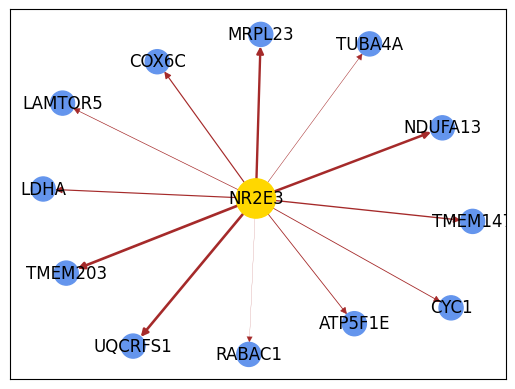

In [20]:
ax = _draw_single_network('NR2E3',regulon_r,tstat['exc'])

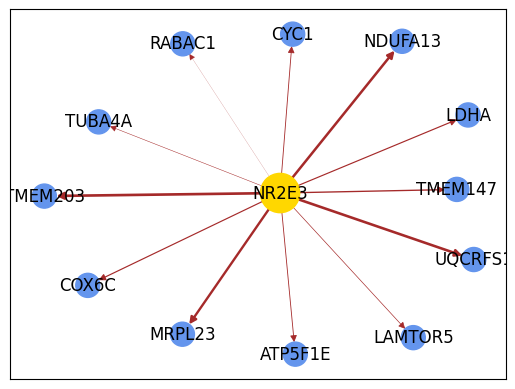

In [21]:
ax = _draw_single_network('NR2E3',regulon_df,tstat['exc'])

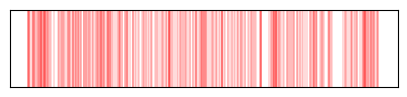

In [22]:
ax = _hits_plot(tstat['exc'],results_1['induced']['hits'],color='red')

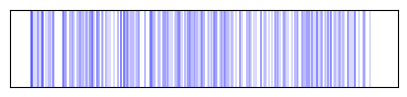

In [23]:
ax = _hits_plot(tstat['exc'],results_1['repressed']['hits'],color='blue')

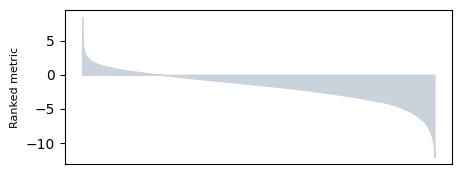

In [24]:
ax = _sig_plot(tstat['exc'])

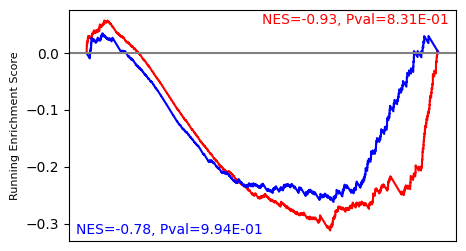

In [14]:
ax = _res_plot(results_1)

# test mraplot

In [8]:
from mraGSEAplot.mraplot import mraplot

## default order

/home/chw_linux/profolio/github/mraGSEAplot/test/../mraGSEAplot/_regulon_convert.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regulon_df = pd.concat([regulon_df,temp_df],ignore_index=True)


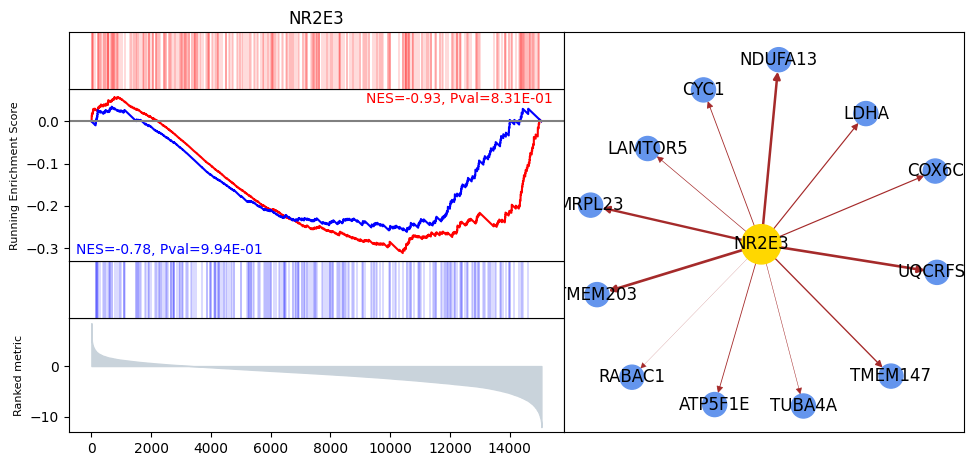

In [27]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_r)

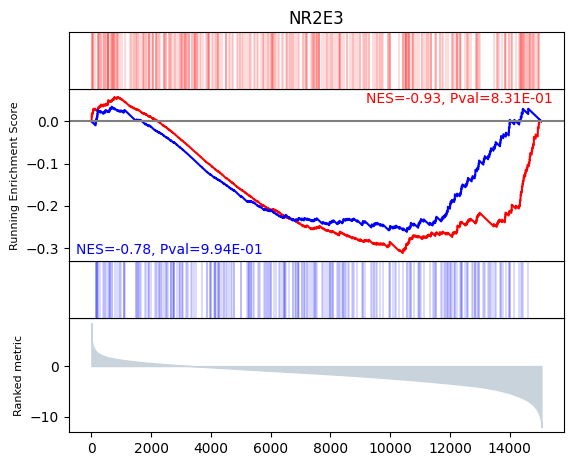

In [29]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_df, network=False)

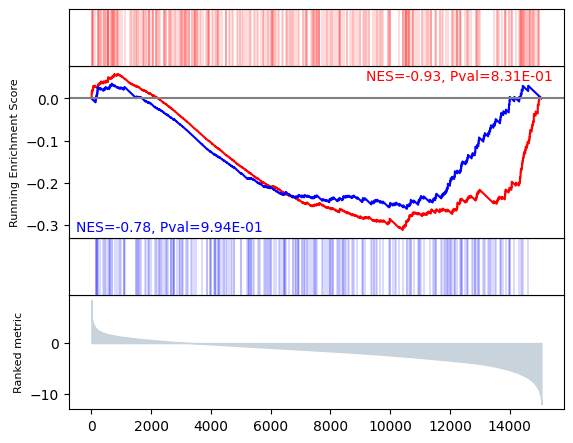

In [30]:
fig = mraplot(tstat['exc'], gsea_results=results_1, network=False)

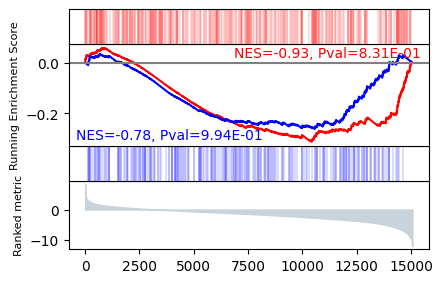

In [16]:
fig = mraplot(tstat['exc'], gsea_results=results_1, network=False, figsize=(4,3))

## use order to rearrange plot

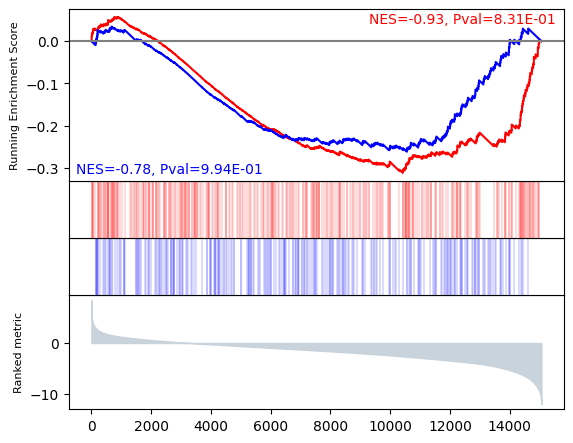

In [17]:
fig = mraplot(tstat['exc'], gsea_results=results_1, network=False, order=[2,1,3,4])

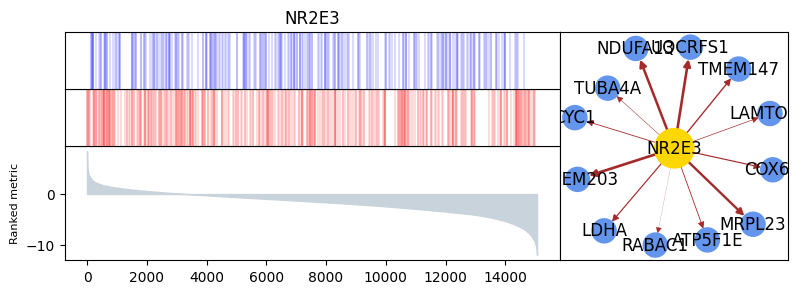

In [18]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_df, network=True, order=[2,'',1,3])

## use "bottom" and "top" to arrange plots

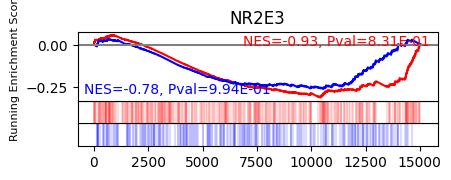

In [20]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_df, sigplot=False, res='top',network=False, figsize=(4,2))

/home/chw_linux/profolio/github/mraGSEAplot/test/../mraGSEAplot/_regulon_convert.py:15: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  regulon_df = pd.concat([regulon_df,temp_df],ignore_index=True)


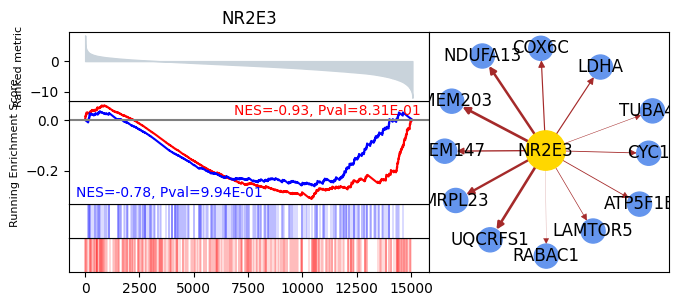

In [21]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_r, sigplot='top', pos_hits='bottom',network=True, figsize=(4,3))

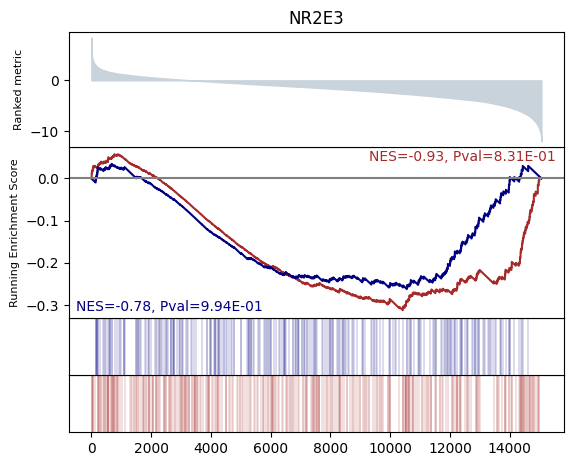

In [9]:
fig = mraplot(tstat['exc'], MR='NR2E3',regulon=regulon_r, sigplot='top', pos_hits='bottom',network=False, pos_color="brown",neg_color="navy")